1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is the 2005 number of hurricanes signficantly larger than the other years?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 2 or larger with respect a normal distribution, or equivalently a level of significance of 0.022.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

Z-score = 3.4661629670697414
p-value = 0.0002639715869149896


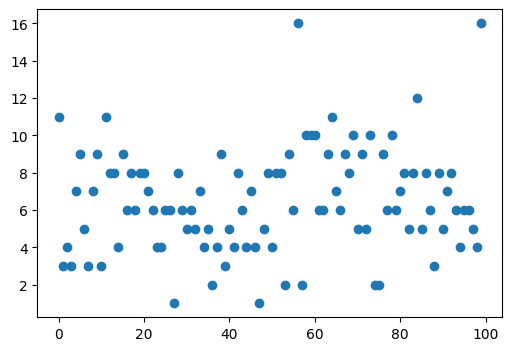

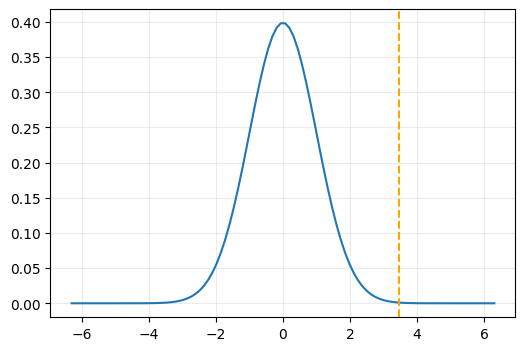

In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

x0 = 15
mu = 6.3
var = np.sqrt(mu)

#the number of hurricanes per year is random
random_numbers = stats.poisson.rvs(mu, size=100)

p = np.arange(0, 100)
plt.figure(figsize=(6,4))
plt.scatter(p, random_numbers)

#statistically significance probability
x = np.linspace(-mu, mu, 100)#centering the image so that it is in the center
y = stats.norm.pdf(x) #centering the normal distribution in 0
plt.figure(figsize=(6,4))
plt.plot(x, y)

#calculating the Z-score
Z = abs(x0 - mu)/var
plt.axvline(Z, linestyle='--', color='orange')
plt.grid(alpha=0.25)
print('Z-score =', Z)

# calculate the p-value as the sum of the left tail + the right tail
pvalue = stats.norm.cdf(-Z) 
print('p-value =', pvalue)

#The p-value yields the probability of observing more than 15 hurricanes in one year. Such
#probability is of 0.05%. Which is way smaller than the level of significance given of 0.022, 
#i.e. 2%, therefore the number of hurricanes in 2005 is way larger with respect to the ones of
# the other years.

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

T = -3.786997938137629
p-value = 0.004302464132864604


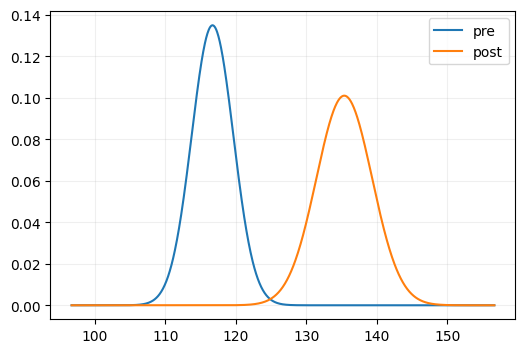

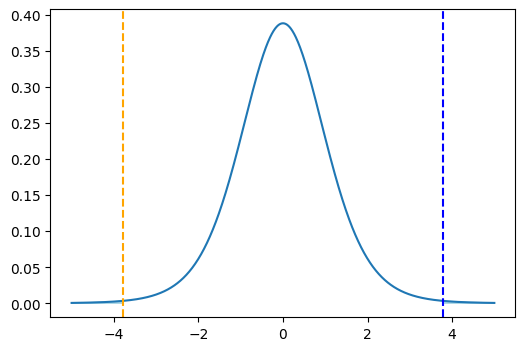

In [13]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

sigma1 = np.sqrt(np.var(pre, ddof=1))
sigma2 = np.sqrt(np.var(post, ddof=1))
sigma = np.sqrt((sigma1**2 + sigma2**2)/2)

mean1 = np.mean(pre) #mean of the vector is different from mu
mean2 = np.mean(post)

n = len(pre)
T = (mean1-mean2)/(sigma*np.sqrt(2/n))
print('T =', T)

x = np.linspace(mean1-20, mean1+40, 1000)
y1 = stats.norm.pdf(x, loc=mean1, scale=sigma1/np.sqrt(n))
y2 = stats.norm.pdf(x, loc=mean2, scale=sigma2/np.sqrt(n))

#plot of the normal distribution
plt.figure(figsize=(6,4))
plt.plot(x, y1, label='pre')
plt.plot(x, y2, label='post')
plt.grid(alpha=0.2)
plt.legend(['pre', 'post'])

#plot the test statistics and its pdf
x = np.linspace(-5, +5, 1000)
ts = stats.t.pdf(x, n-1)

plt.figure(figsize=(6,4))
plt.plot(x, ts)
plt.fill_between(x, ts, where=np.abs(x)>np.abs(T), color='lightblue')
plt.axvline(T, linestyle='--', color='orange')
plt.axvline(-T, linestyle='--', color='blue')

pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("p-value =", pvalue)

#The p-value is below the significance level of alpha equal to 0.05, then
#the null hypothesis is rejected

3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

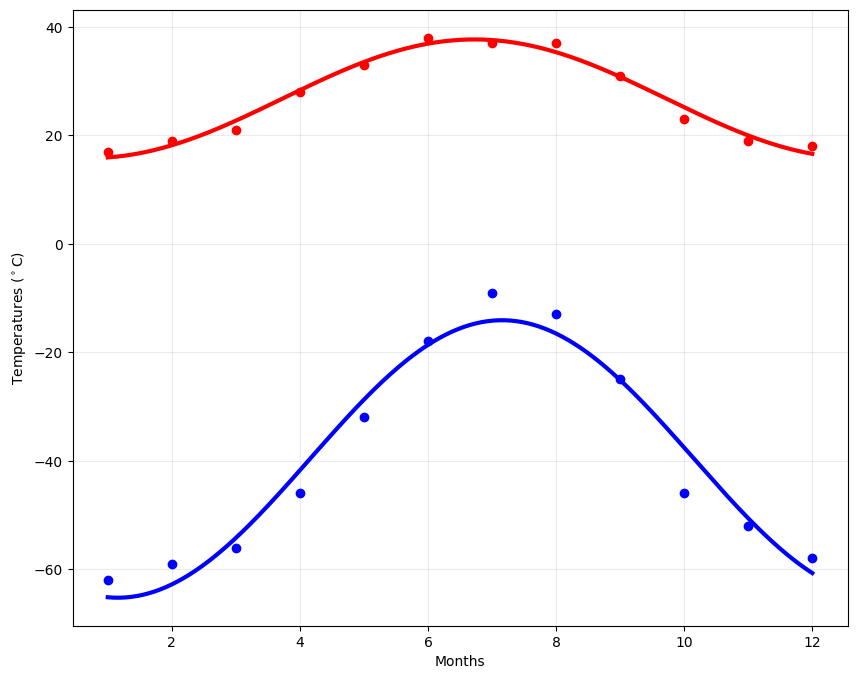

In [8]:
import numpy as np
from scipy import optimize, stats
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

max = [17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]
min = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]

xM = np.linspace(1, 12, len(max))
xm = np.linspace(1, 12, len(min))

plt.figure(figsize=(10,8))
plt.plot(xm, min, 'bo')
plt.plot(xM, max, 'ro')

def f(x, ampl, mean, offset):
    return mean+ampl*np.sin((x+offset)*2*np.pi/x.max())

days = np.linspace(1, 12, num=365)

popt_min, pcov_min = optimize.curve_fit(f, xm, min, p0=[4, 15, 0], full_output=False)
plt.plot(days, f(days, popt_min[0], popt_min[1], popt_min[2]), color='blue', linewidth=3)
plt.xlabel('Months')
plt.ylabel('Temperatures')

popt_max, pcov_max = optimize.curve_fit(f, xM, max, p0=[12, 10, 0], full_output=False)
plt.plot(days, f(days, popt_max[0], popt_max[1], popt_max[2]), color='red', linewidth=3)
plt.xlabel('Months')
plt.ylabel('Temperatures ($^\circ$C)')

plt.grid(alpha=0.25)
#The fit obtained are reasonable. Moreover the temperature offset for the fitting of 
#cold and hot temperatures are for sure different.


4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform the $\chi^2$ goodness-of-fit test. What is the p-value of the fit? Is the fit function appropriate to describe the data?

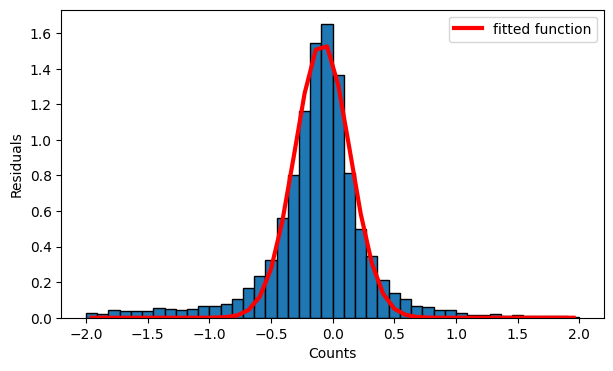

38.9766237566628


/home/sara/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:8064: RuntimeWarning: divide by zero encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from scipy import optimize, stats

filename = "data/residuals_261.pkl"
infile = open(filename, 'rb')
new_dict = pickle.load(infile)

df = pd.read_pickle(filename)
df_list_residuals = (df).tolist()['residuals']
df_mod = pd.DataFrame(df.tolist())

#Plotting the histogram
plt.figure(figsize=(7,4))
counts, bin_edges, _ = plt.hist(df_mod['residuals'], bins=44, range=(-2, +2), density=True, cumulative=False, edgecolor='black')
plt.xlabel('Counts')
plt.ylabel('Residuals')
plt.legend(['counts histogram'])

#setting the uncertainty for each bin
uncert_bin = np.array(np.sqrt(np.abs(counts)))

#defining an appropriate function
def f(x, scale, mean, sigma):
    return scale*np.exp(-(x-mean)**2/(2*sigma**2))

#plotting the fitted function
x = (bin_edges[:-1] + bin_edges[1:])/2
popt, pcov = optimize.curve_fit(f, x, counts, p0=[max(counts), 5, 45])
plt.plot(x, f(x, popt[0], popt[1], popt[2]), color='red', linewidth=3)
plt.legend(['fitted function'])
plt.show()

#performing a goodness of fit test
observed = counts
expected = np.round(f(x, popt[0], popt[1], popt[2])).astype(int)
t_obs = np.sum(observed)
t_exp = np.sum(expected)
observed = observed/t_obs
expected = expected/t_exp
chi_square_test_statistic, _ = stats.chisquare(observed, expected)
chi_square_test_statistic = sum((observed - expected)**2 / (observed**2))
print(chi_square_test_statistic)

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters and thier uncertainties?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have? Describe it with a comment in the code.


- **Optional:** Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

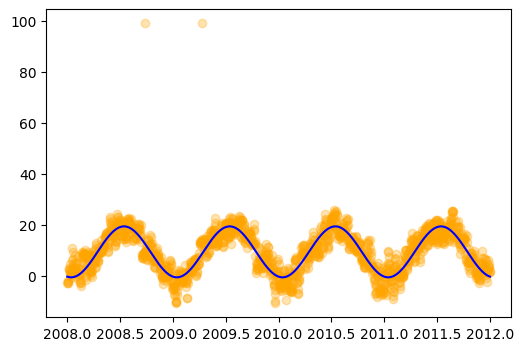

The best-fit value for a is -9.99 +- 0.18
The best-fit value for b is 12.33 +- 0.02
The best-fit value for c is 9.38 +- 0.13
The mean temperature predicted is 9.37746365439056
The mean temperature for the coldest time of the year is -0.6037264394273087
The mean temperature for the hottest time of the year is 19.372243988699573


In [14]:
#!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt

import numpy as np
import pandas as pd
from scipy import optimize, stats
import matplotlib.pyplot as plt

df = pd.read_csv('data/munich_temperatures_average_with_bad_data.txt', names=['date', 'temperature'], delimiter=' ')
df_mod = df[(df['date']>=2008) & (df['date']<=2012)]

def f(time, a, b, c):
    return a*np.cos(2*np.pi*time+b)+c

x = np.linspace(2008, 2012, len(df_mod['date']))
popt, pcov = optimize.curve_fit(f, df_mod['date'], df_mod['temperature'])

plt.figure(figsize=(6,4))
plt.plot(x, f(x, popt[0], popt[1], popt[2]), color='blue')
plt.scatter(x, df_mod['temperature'], alpha=0.3, color='orange')
plt.show()

#best-fit values and their uncertainties
print('The best-fit value for a is %.2f +- %.2f' % (popt[0], np.sqrt(pcov[0,0])))
print('The best-fit value for b is %.2f +- %.2f' % (popt[1], np.sqrt(pcov[1,1])))
print('The best-fit value for c is %.2f +- %.2f' % (popt[2], np.sqrt(pcov[2,2])))

#predicted temperatures given by the model
temp_pred = f(x, *popt)
df_pred = pd.DataFrame({'date': x, 'temperature': temp_pred})

min_temp_pred = np.zeros(4)
j = 0
incr = [0, 1, 2, 3]
for i in incr[:len(min_temp_pred)]:
    year = pd.DataFrame((df_pred[(df_pred['date']>=2008.0+1*i) & (df_pred['date']<=2009.0+1*i)]))
    min_temp_pred[j] = year['temperature'].min()
    j += 1

max_temp_pred = np.zeros(4)
j = 0
for i in incr[:len(max_temp_pred)]:
    year = pd.DataFrame((df_pred[(df_pred['date']>=2008.0+1*i) & (df_pred['date']<=2009.0+1*i)]), columns=['date', 'temperature'])
    max_temp_pred[j] = year['temperature'].max()
    j += 1

print('The mean temperature predicted is', temp_pred.mean())
print('The mean temperature for the coldest time of the year is', min_temp_pred.mean())
print('The mean temperature for the hottest time of the year is', max_temp_pred.mean())

#The parameter b of the function f represnts the phase of the function